# Read Data

In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd

In [70]:
# Train Data:
# Store - the store number
# Dept - the department number
# Date - the week
# Weekly_Sales -  sales for the given department in the given store
# IsHoliday - whether the week is a special holiday week

train_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/train.csv.zip')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [71]:
# Test Data:
# Store - the store number
# Dept - the department number
# Date - the week
# IsHoliday - whether the week is a special holiday week

test_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/test.csv.zip')
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [72]:
# Info about stores
stores_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [73]:
# Features data:
# Store - the store number
# Date - the week
# Temperature - average temperature in the region
# Fuel_Price - cost of fuel in the region
# MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
# CPI - the consumer price index
# Unemployment - the unemployment rate
# IsHoliday - whether the week is a special holiday week

features_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/features.csv.zip')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Merge Data

In [ ]:
train_merged = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_merged = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [ ]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Feature Engineering (Date)

In [ ]:
def convert_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0

In [ ]:
new_date_cols = ['Year', 'Month', 'Day', 'WeekOfDay']

In [ ]:
convert_date(train_merged)
convert_date(test_merged)

In [ ]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0


In [ ]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2,44.0
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9,45.0
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16,46.0
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23,47.0
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30,48.0


In [ ]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [ ]:
train_merged.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [ ]:
!pip install -q dagshub "mlflow < 3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [74]:
import dagshub
import mlflow


dagshub.init(repo_owner='mrekh21', repo_name='Walmart_Recruiting', mlflow=True)

experiment_name = "XGBoost_Training"

mlflow.set_experiment(experiment_name)

Initialized MLflow to track repo "mrekh21/Walmart_Recruiting"

Repository mrekh21/Walmart_Recruiting initialized!

<Experiment: artifact_location='mlflow-artifacts:/cddf86ee99ec4910a0ca8b53fe58f82c', creation_time=1751811949645, experiment_id='0', last_update_time=1751811949645, lifecycle_stage='active', name='XGBoost_Training', tags={}>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
plt.style.use('dark_background')
sns.set_palette("bright")

In [ ]:
missing_values = train_merged.isna().sum()

fig = px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

fig.show()
fig.write_html("missing_values_plot.html")

# EDA

In [ ]:
type_counts = train_merged.Type.value_counts().to_dict()
df = pd.DataFrame(list(type_counts.items()), columns=['StoreType', 'Counts'])

fig = px.pie(df, values='Counts', names='StoreType',
             title='Percentage of Store Types',labels='StoreType', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

fig.write_html("percent_of_store_types.html")

In [ ]:
avg_weekly_sales = train_merged.groupby('Type')['Weekly_Sales'].mean().to_dict()

df = pd.DataFrame(list(avg_weekly_sales.items()), columns=['StoreType', 'AverageSales'])

fig = px.bar(df,
             x="StoreType",
             y="AverageSales",
             title="Average Weekly Sales Per Store",
             template='plotly_dark')
fig.show()

fig.write_html("avg_weekly_sales_per_store.html")

In [ ]:
import plotly.graph_objs as go

sales_2010 = train_merged[(train_merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2010 = pd.DataFrame(list(sales_2010.items()), columns=['Month', 'AvgMonthlySales2010'])

sales_2011 = train_merged[(train_merged.Year == 2011)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2011 = pd.DataFrame(list(sales_2011.items()), columns=['Month', 'AvgMonthlySales2011'])

sales_2012 = train_merged[(train_merged.Year == 2012)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2012 = pd.DataFrame(list(sales_2012.items()), columns=['Month', 'AvgMonthlySales2012'])


monthly_merged = df_2010.merge(df_2011, how='right', on='Month').merge(df_2012, how='left', on='Month')


trace_1 = go.Bar(x = df_2010.Month,
                y = df_2010.AvgMonthlySales2010,
                name = "AvgMonthlySales2010")

trace_2 = go.Bar(x = df_2011.Month,
                y = df_2011.AvgMonthlySales2011,
                name = "AvgMonthlySales2011")

trace_3 = go.Bar(x = df_2012.Month,
                y = df_2012.AvgMonthlySales2012,
                name = "AvgMonthlySales2012")

data = [trace_1, trace_2, trace_3]

layout = go.Layout(barmode = "group",
                   template='plotly_dark',
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales",
                   title="Average Monthly Sales Per Year")

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(dtick=1)
fig.show()

fig.write_html("avg_monthly_sales_per_store.html")

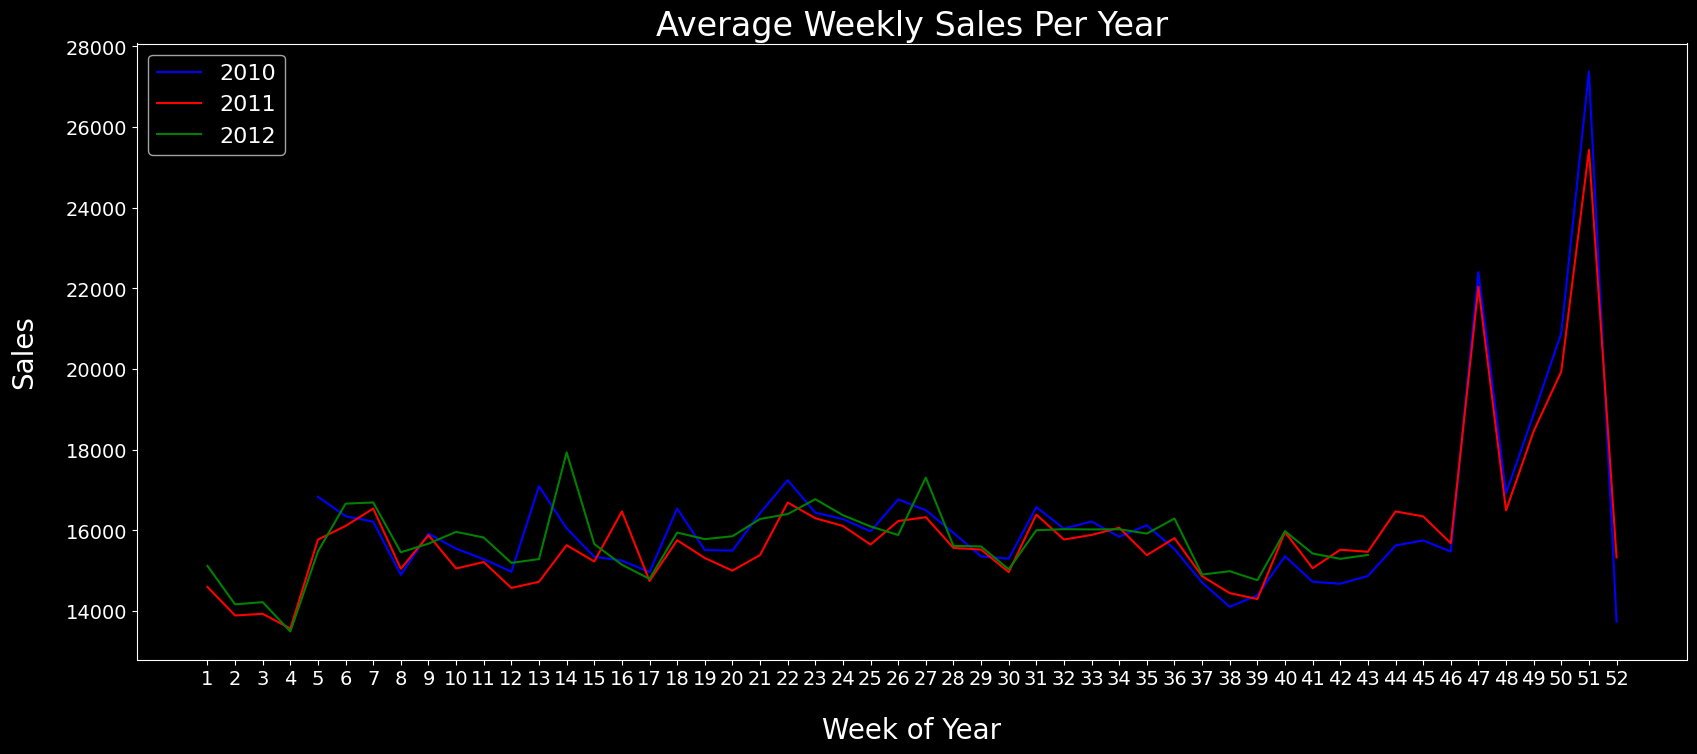

In [ ]:
weekly_sales_2010 = train_merged[train_merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = train_merged[train_merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = train_merged[train_merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 'b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, 'g')

plt.xticks(np.arange(1, 53, step=1), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=16);

plt.savefig("avg_weekly_sales_per_year.png")

In [ ]:
store_sales = train_merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(store_sales,
             x=store_sales.index,
             y=store_sales.values,
             title="Average Weekly Sales Per Store",
             labels={'x':'Stores', 'y':'Sales'},
             template='plotly_dark')

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

fig.write_html("avg_weekly_sales_per_store.html")

In [ ]:
from plotly.subplots import make_subplots

store_sales_2010 = train_merged[train_merged.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = train_merged[train_merged.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = train_merged[train_merged.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Weekly Sales Per Store 2010", "Average Weekly Sales Per Store 2011", "Average Weekly Sales Per Store 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Average Sales", row=2, col=1)
fig.update_yaxes(title_text="Average Sales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

fig.write_html("avg_weekly_sales_per_store_yearly.html")

In [ ]:
dept_sales = train_merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(dept_sales,
             x=dept_sales.values,
             y=dept_sales.index,
             template = 'plotly_dark',
             title="Average Weekly Sales Per Department",
             labels={'x':'Dept', 'y':'Sales'},
             orientation='h', height=1200, width=1000)

fig.update_yaxes(tick0=1, dtick=1)

fig.show()

fig.write_html("avg_weekly_sales_per_dept.html")

In [ ]:
dept_sales_2010 = train_merged[train_merged.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = train_merged[train_merged.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = train_merged[train_merged.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Weekly Sales Per Department 2010", "Average Weekly Sales Per Department 2011", "Average Weekly Sales Per Department 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="Average Sales", row=1, col=1)
fig.update_xaxes(title_text="Average Sales", row=1, col=2)
fig.update_xaxes(title_text="Average Sales", row=1, col=3)

fig.update_yaxes(title_text="Department", row=1, col=1)
fig.update_yaxes(title_text="Department", row=1, col=2)
fig.update_yaxes(title_text="Department", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

fig.write_html("avg_weekly_sales_per_dept_yearly.html")

In [ ]:
holiday_sales = train_merged.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = train_merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Average Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(template='plotly_dark', showlegend=False)
fig.show()

fig.write_html("holidays_nonholidays.html")

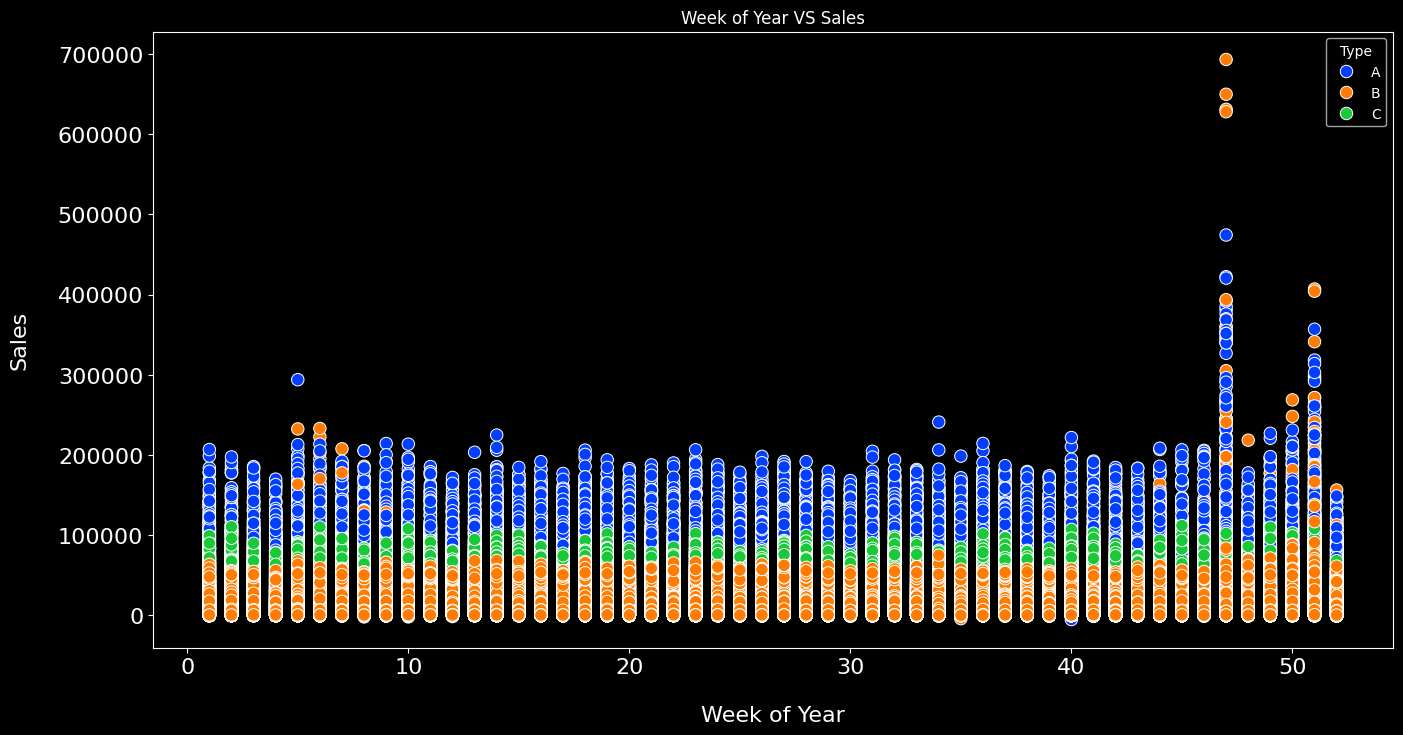

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.WeekOfYear, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Week of Year', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)
plt.title('Week of Year VS Sales');

plt.savefig("week_vs_sales.png")

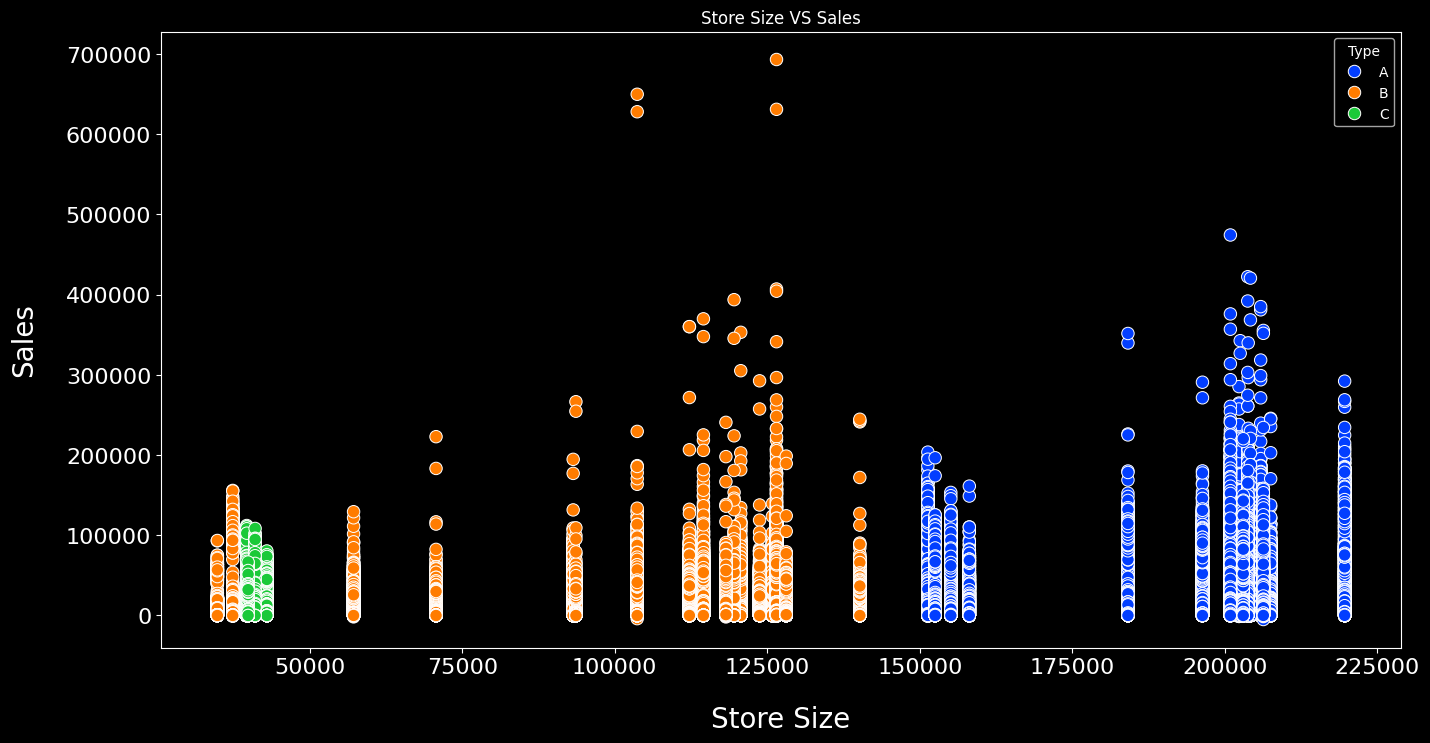

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.Size, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Store Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Store Size VS Sales');

plt.savefig("store_size_vs_sales.png")

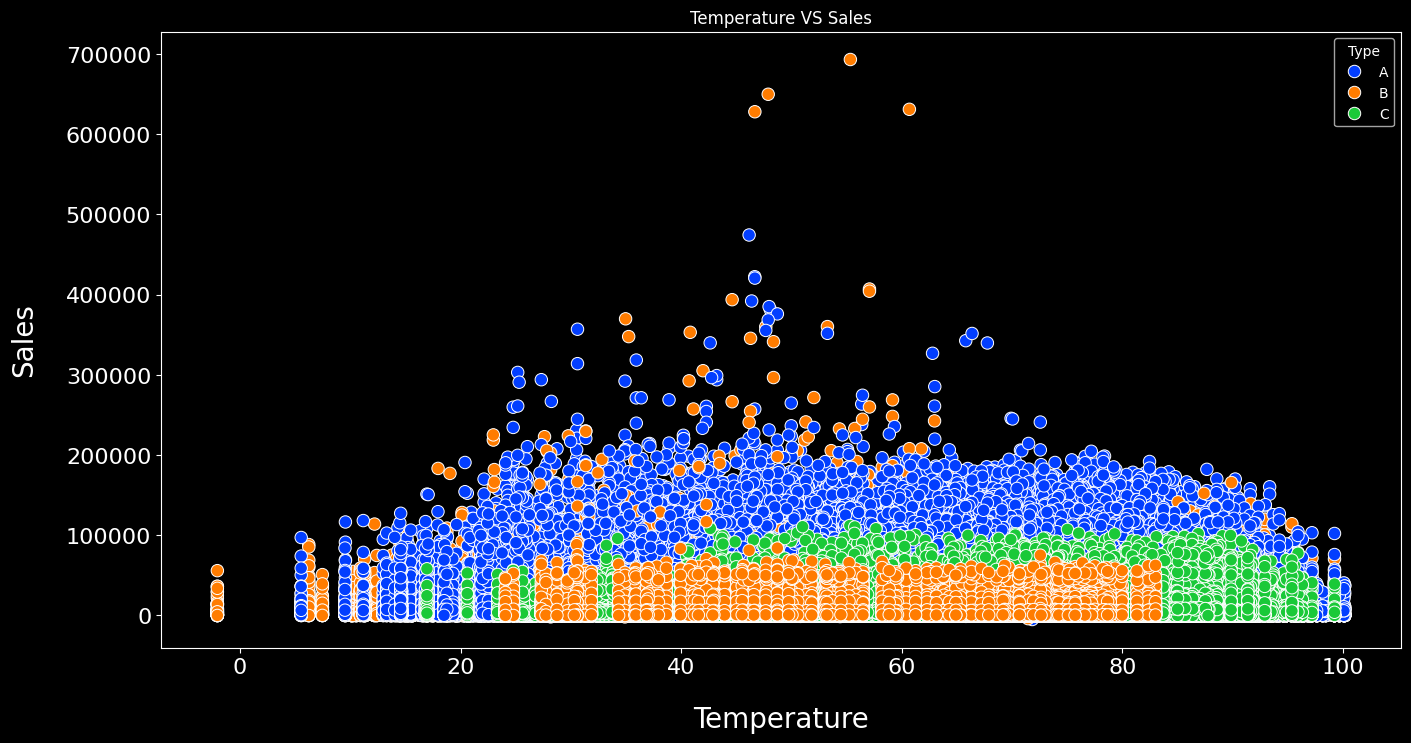

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.Temperature, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Temperature VS Sales');

plt.savefig("temperature_vs_sales")

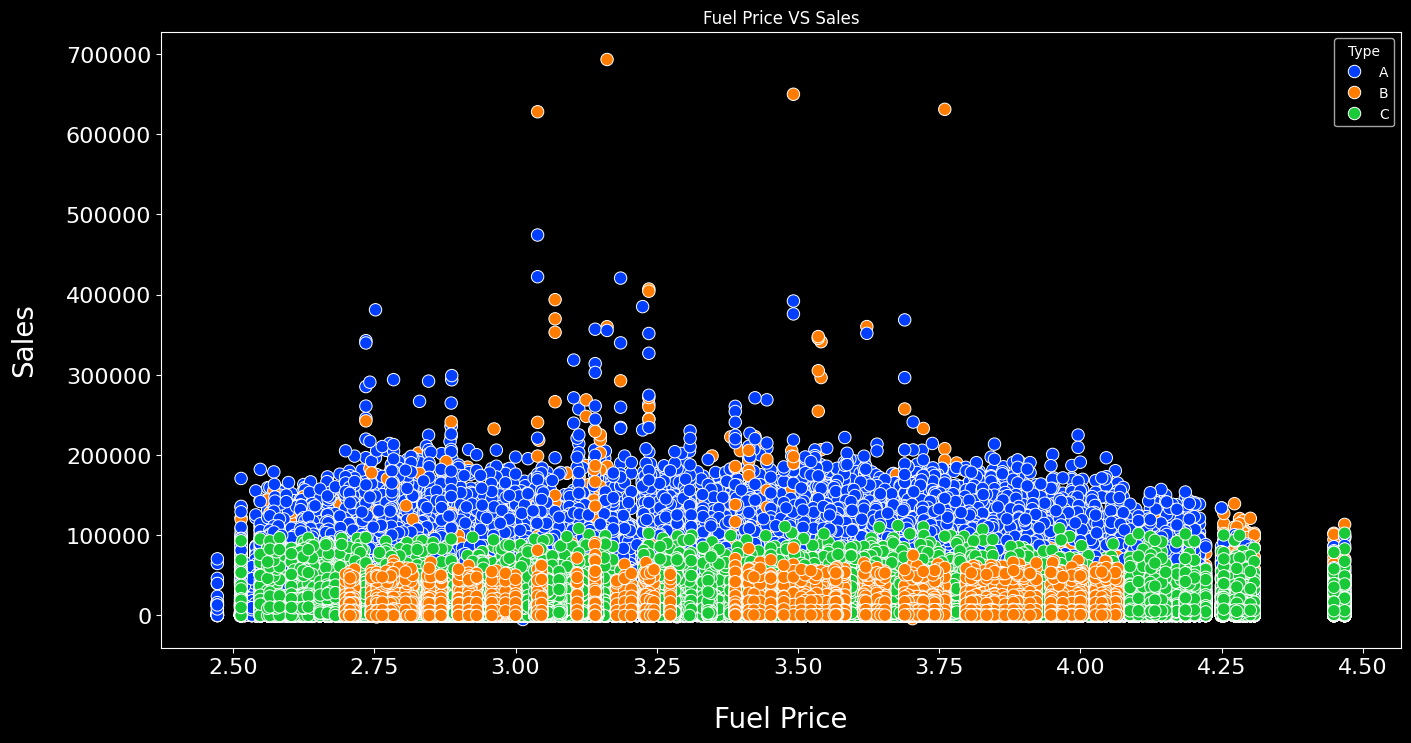

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.Fuel_Price, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Fuel Price VS Sales');

plt.savefig("fuel_price_vs_sales.png")

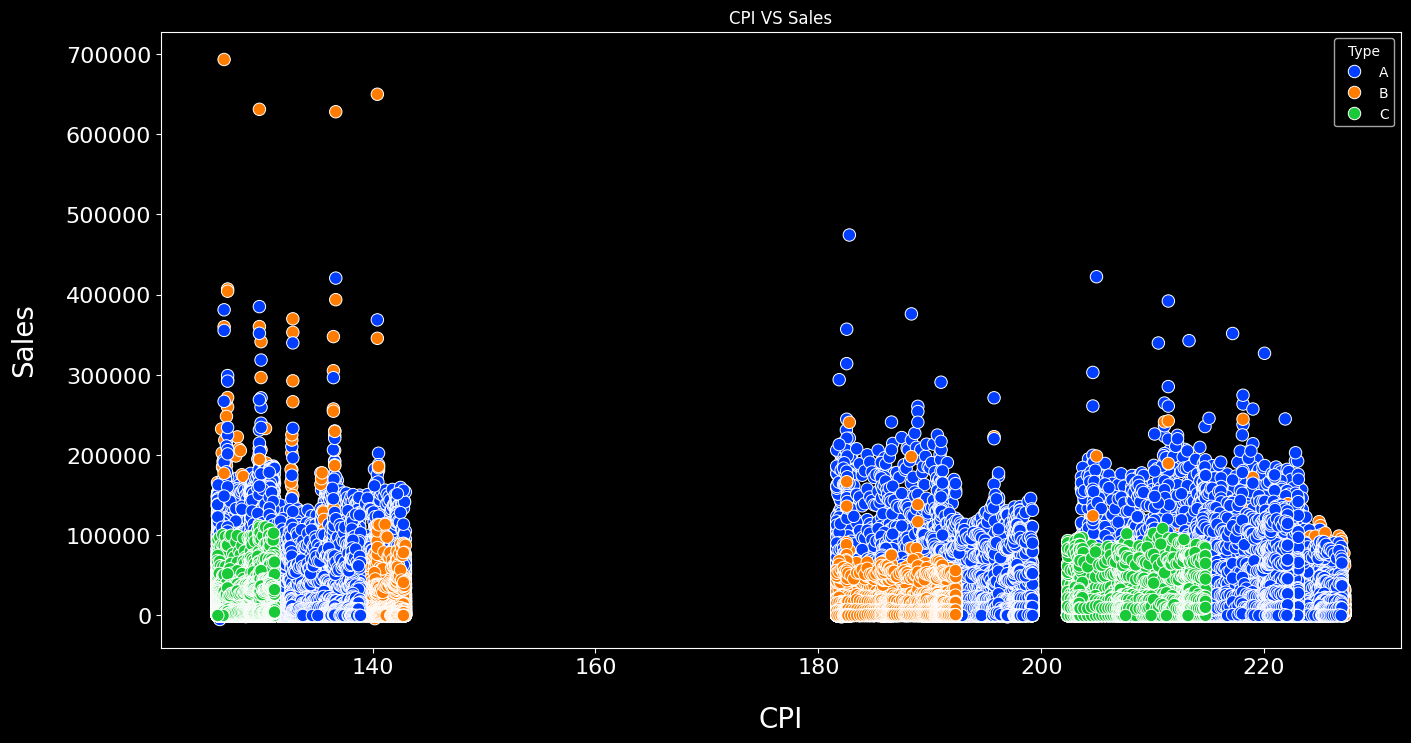

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.CPI, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('CPI VS Sales');

plt.savefig("cpi_vs_sales.png")

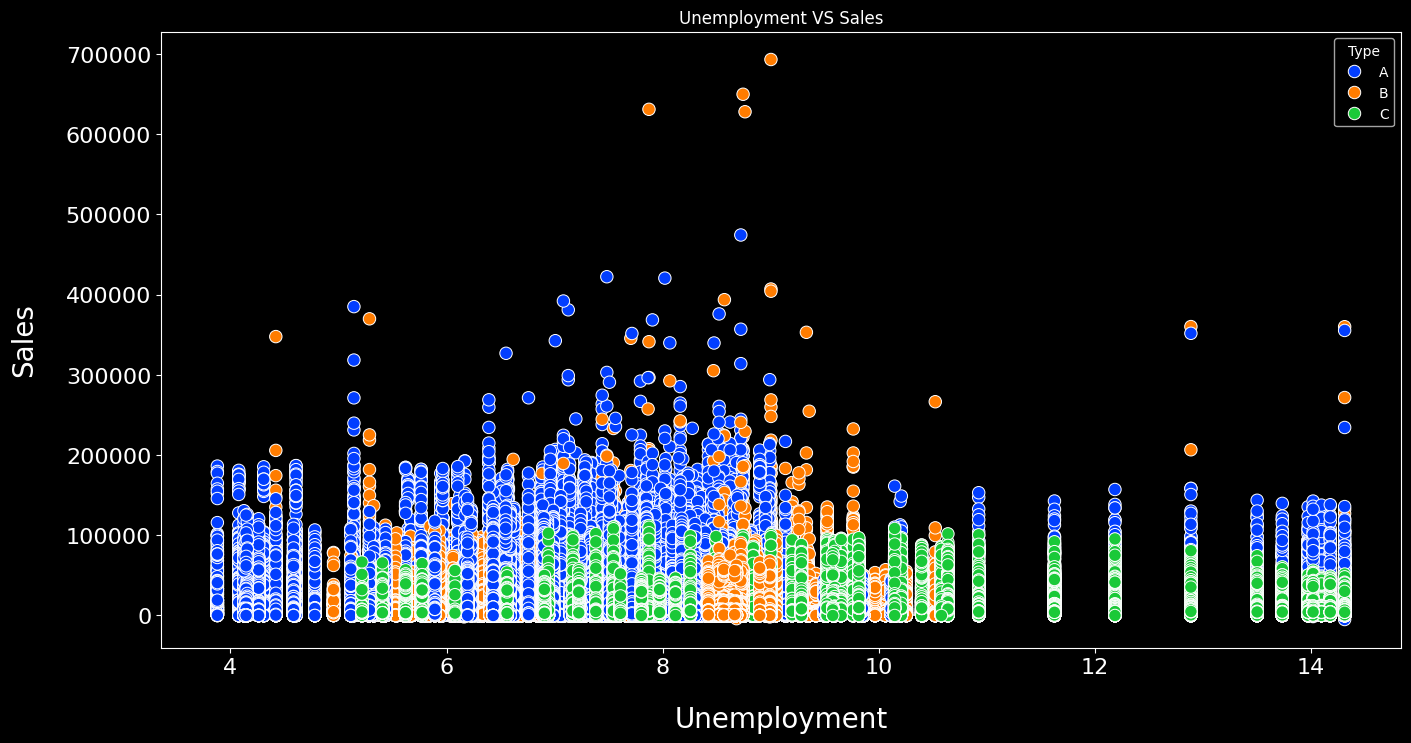

In [ ]:
plt.figure(figsize=(16,8))

sns.set_palette("bright")
sns.scatterplot(x=train_merged.Unemployment, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Unemployment VS Sales');

plt.savefig("unemployment_vs_sales.png")

In [ ]:
storetype_values = {'A' : 3, 'B' : 2, 'C' : 1}

train_merged['Type_Numeric'] = train_merged.Type.map(storetype_values)
test_merged['Type_Numeric'] = train_merged.Type.map(storetype_values)

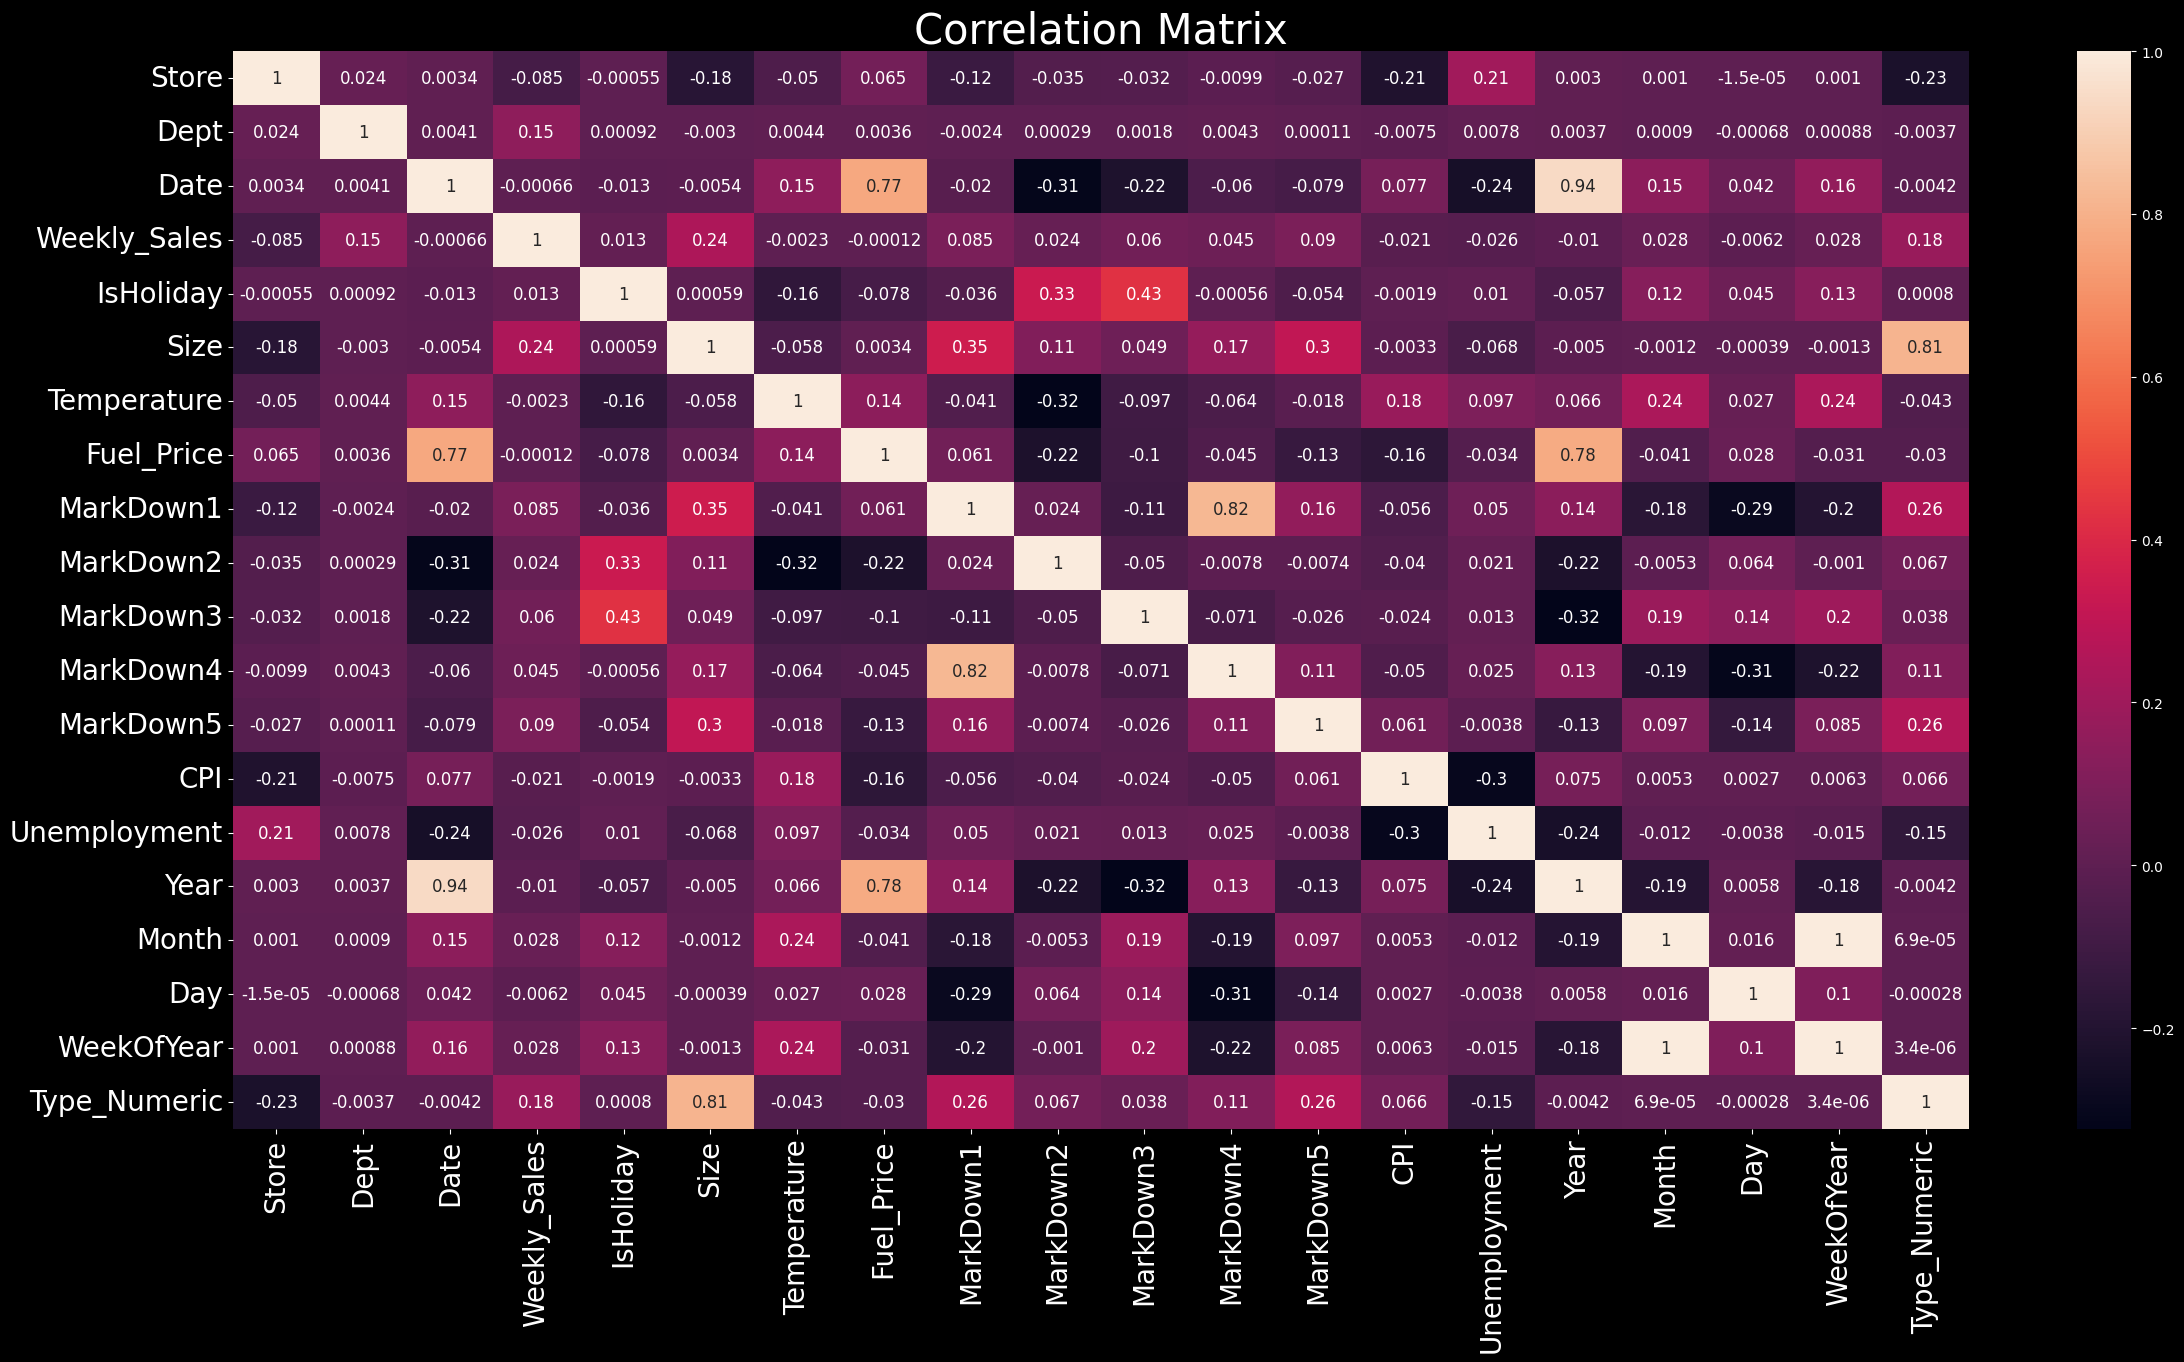

In [ ]:
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.heatmap(train_merged.drop(columns=['Type']).corr(), annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

plt.savefig("correlation_matrix.png")

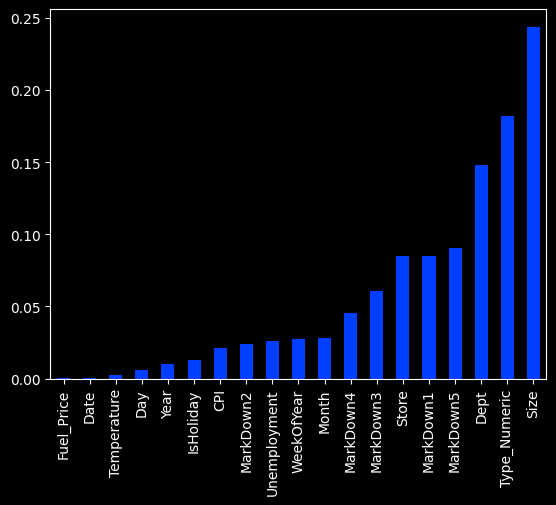

In [ ]:
train_merged.drop(columns=['Type']).corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

* Markdown1-5, Temperature, Fuel_Price, CPI, Unemployment have week correlation with Weekly_Sales- Drop
* Month, Day will be dropped, because WeekOfYear has the same information

# Feature Selection

In [ ]:
columns_to_drop = ['Date', 'Temperature', 'Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day']

In [ ]:
train_merged = train_merged.drop(columns=columns_to_drop)
test_merged = test_merged.drop(columns=columns_to_drop)

In [ ]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,WeekOfYear,Type_Numeric
0,1,1,24924.50,False,151315,2010,5.0,3
1,1,1,46039.49,True,151315,2010,6.0,3
2,1,1,41595.55,False,151315,2010,7.0,3
3,1,1,19403.54,False,151315,2010,8.0,3
4,1,1,21827.90,False,151315,2010,9.0,3


# Feature Engineering (Holidays)

In [ ]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13                         ---> WeekOfYear = 6
# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13                            ---> WeekOfYear = 36
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13                      ---> WeekOfYear = 47
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13                         ---> WeekOfYear = 52

train_merged['SuperBowlWeek'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 6.0 else 0)
train_merged['LaborDay'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 36.0 else 0)
train_merged['Thanksgiving'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 47.0 else 0)
train_merged['Christmas'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 52.0 else 0)

test_merged['SuperBowlWeek'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 6.0 else 0)
test_merged['LaborDay'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 36.0 else 0)
test_merged['Thanksgiving'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 47.0 else 0)
test_merged['Christmas'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 52.0 else 0)

In [ ]:
new_holiday_cols = ['SuperbowlWeek', 'LaborDay', 'Thanksgiving', 'Christmas']

In [ ]:
train_merged['IsHoliday'] = train_merged['IsHoliday'].astype(int)
test_merged['IsHoliday'] = test_merged['IsHoliday'].astype(int)

In [ ]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,WeekOfYear,Type_Numeric,SuperBowlWeek,LaborDay,Thanksgiving,Christmas
0,1,1,24924.50,0,151315,2010,5.0,3,0,0,0,0
1,1,1,46039.49,1,151315,2010,6.0,3,1,0,0,0
2,1,1,41595.55,0,151315,2010,7.0,3,0,0,0,0
3,1,1,19403.54,0,151315,2010,8.0,3,0,0,0,0
4,1,1,21827.90,0,151315,2010,9.0,3,0,0,0,0


In [ ]:
input_cols = train_merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

In [ ]:
input_cols

['Store',
 'Dept',
 'IsHoliday',
 'Size',
 'Year',
 'WeekOfYear',
 'Type_Numeric',
 'SuperBowlWeek',
 'LaborDay',
 'Thanksgiving',
 'Christmas']

In [ ]:
with mlflow.start_run(run_name="Feature_Engineering"):
    mlflow.log_param("New Date Columns", str(new_date_cols))
    mlflow.log_param("New Holiday Columns" , str(new_holiday_cols))
    mlflow.log_param("Store Type encoding", str(storetype_values))
    mlflow.log_param("IsHoliday encoding", str({True: 1, False: 0}))
mlflow.end_run()

🏃 View run Feature_Engineering at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/238b0393053d4a6291ad6035fbf22050
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [ ]:
with mlflow.start_run(run_name="EDA"):
    mlflow.log_artifact("missing_values_plot.html")
    mlflow.log_artifact("percent_of_store_types.html")
    mlflow.log_artifact("avg_weekly_sales_per_store.html")
    mlflow.log_artifact("avg_monthly_sales_per_store.html")
    mlflow.log_artifact("avg_weekly_sales_per_year.png")
    mlflow.log_artifact("avg_weekly_sales_per_store_yearly.html")
    mlflow.log_artifact("avg_weekly_sales_per_dept.html")
    mlflow.log_artifact("avg_weekly_sales_per_dept_yearly.html")
    mlflow.log_artifact("holidays_nonholidays.html")
    mlflow.log_artifact("week_vs_sales.png")
    mlflow.log_artifact("store_size_vs_sales.png")
    mlflow.log_artifact("temperature_vs_sales.png")
    mlflow.log_artifact("fuel_price_vs_sales.png")
    mlflow.log_artifact("cpi_vs_sales.png")
    mlflow.log_artifact("unemployment_vs_sales.png")
    mlflow.log_artifact("correlation_matrix.png")

mlflow.end_run()

🏃 View run EDA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/a74de1b4933c4f93b8b6929ba5a29e2f
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [ ]:
with mlflow.start_run(run_name="Feature_Selection"):
    mlflow.log_param("Dropped Columns", str(columns_to_drop))
    mlflow.log_param("Selected Features", str(input_cols))

mlflow.end_run()

🏃 View run Feature_Selection at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/2465966f4f074de5b55280a799a47cbc
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


# Preprocessing Pipeline

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreprocessingPipeline(BaseEstimator, TransformerMixin):

    def __init__(self, stores_df, features_df):
        self.stores_df = stores_df
        self.features_df = features_df

        self.storetype_map = {'A': 3, 'B': 2, 'C': 1}
        self.columns_to_drop = [
            'Date', 'Temperature', 'Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
            'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day'
        ]

    def fit(self, X, y=None):
        # No fitting logic, just returns self
        return self

    def transform(self, X):
        df = X.copy()

        # 1. Merge
        df = df.merge(self.stores_df, how='left').merge(self.features_df, how='left')

        # 2. Date features
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(float)

        # 3. Encode Type
        df['Type_Numeric'] = df['Type'].map(self.storetype_map)

        # 4. Encode IsHoliday
        df['IsHoliday'] = df['IsHoliday'].astype(int)

        # 5. Holiday flags
        holiday_dates = {
            'SuperBowl': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']),
            'LaborDay': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']),
            'Thanksgiving': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']),
            'Christmas': pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'])
        }

        for name, dates in holiday_dates.items():
            df[name] = df['Date'].isin(dates).astype(int)

        # 6. Drop columns
        drop_cols = [col for col in self.columns_to_drop if col in df.columns]
        df = df.drop(columns=drop_cols)

        return df


In [76]:
def split_train_val(df, val_ratio=0.2):
    train_list = []
    val_list = []

    for _, group in df.groupby(["Store", "Dept"]):
        group = group.sort_values("Date")
        n = len(group)
        n_val = int(n * val_ratio)

        val = group.iloc[-n_val:]
        train = group.iloc[:-n_val]

        train_list.append(train)
        val_list.append(val)

    train_df = pd.concat(train_list).reset_index(drop=True)
    val_df = pd.concat(val_list).reset_index(drop=True)
    return train_df, val_df

In [77]:
def split_by_cutoff(df, cutoff_date):
    train_df = df[df["Date"] < cutoff_date].copy()
    val_df = df[df["Date"] >= cutoff_date].copy()
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True)

In [ ]:
print(pd.to_datetime(train_df['Date']).min(), pd.to_datetime(train_df['Date']).max())

2010-02-05 00:00:00 2012-10-26 00:00:00


In [78]:
cutoff_date = '2012-03-23'

In [84]:
train, val = split_by_cutoff(train_df, cutoff_date)

X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

X_val = val.drop(columns=['Weekly_Sales'])
y_val = val['Weekly_Sales']



# from sklearn.model_selection import train_test_split

# train, val = train_test_split(
#     train_df, test_size=0.2, random_state=42)

# X_train = train.drop(columns=['Weekly_Sales'])
# y_train = train['Weekly_Sales']

# X_val = val.drop(columns=['Weekly_Sales'])
# y_val = val['Weekly_Sales']


In [85]:
from sklearn.model_selection import PredefinedSplit


# Predefined Split (last 22 weeks of X_train as validation)
cutoff_date_ = pd.to_datetime(X_train['Date']).max() - pd.Timedelta(weeks=22)
test_fold = [-1 if date < cutoff_date_ else 0 for date in pd.to_datetime(X_train['Date'])]
predef_split = PredefinedSplit(test_fold)

In [86]:
X_test = test_df.copy()

In [87]:
preprocessor = PreprocessingPipeline(stores_df, features_df)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [88]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer


def WMAE(y_true, y_pred, weights):
    return np.round(np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights), 2)



def wmae_scorer(full_df_with_IsHoliday):
    """
    Creates a scorer that pulls weights from full_df_with_IsHoliday (must match y_true index).
    """
    def scorer(y_true, y_pred):
        import pandas as pd
        if isinstance(y_true, np.ndarray):
            y_true = pd.Series(y_true, index=full_df_with_IsHoliday.index[:len(y_true)])

        weights = full_df_with_IsHoliday.loc[y_true.index, 'IsHoliday'].apply(lambda x: 5 if x else 1).values
        return WMAE(y_true.values, y_pred, weights)

    return make_scorer(scorer, greater_is_better=False, response_method='predict')


# Hyperparameter Tuning for XGBRegressor

In [89]:
import random
from itertools import product
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit



param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "model__n_estimators": [300, 400, 500],
    "model__max_depth": [5, 10, 15],
    "model__learning_rate": [0.01, 0.1, 0.2, 0.3],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.1, 1, 10],
    "model__reg_lambda": [0, 1, 10]
}


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(random_state=42, n_jobs=-1))
])

scorer = wmae_scorer(X_train)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=predef_split,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.3, model__max_depth=10, model__n_estimators=400, model__reg_alpha=0.1, model__reg_lambda=0, model__subsample=1.0, scaler=MinMaxScaler(); total time=  12.3s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=400, model__reg_alpha=10, model__reg_lambda=10, model__subsample=0.8, scaler=None; total time=  22.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=400, model__reg_alpha=10, model__reg_lambda=1, model__subsample=1.0, scaler=None; total time=  13.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=300, model__reg_alpha=0, model__reg_lambda=0, model__subsample=1.0, scaler=MinMaxScaler(); total time=  11.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.3, model__max_depth=10, model__n

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_ty...
                                        'model__learning_rate': [0.01, 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [5, 10, 15],
                                        'model__n_estimators': [300, 400, 500],
                                        'model__reg_alpha': [0, 0.1, 1, 10],
                                        'model__reg_lambda': [0, 1, 10],
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'scaler': [StandardScaler(),
                                                   MinMaxScaler(), None]},
                   random_state=42,
                   scoring=make_scorer(scorer, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [91]:
print("Best scaler:", search.best_params_["scaler"])

print("Best model hyperparameters:")
for k, v in search.best_params_.items():
    if k != "scaler":
        print(f"  {k}: {v}")

print("Best score (WMAE):", -search.best_score_)

Best scaler: StandardScaler()
Best model hyperparameters:
  model__subsample: 0.6
  model__reg_lambda: 1
  model__reg_alpha: 1
  model__n_estimators: 500
  model__max_depth: 15
  model__learning_rate: 0.1
  model__colsample_bytree: 0.6
Best score (WMAE): 1948.37


In [92]:
with mlflow.start_run(run_name="RandomSearchCV_XGBoost"):

    # Log BEST hyperparameters
    best_params = search.best_params_
    mlflow.log_params({f"best__{k}": v for k, v in best_params.items()})

    # Log the SEARCH SPACE (param_grid)
    for param_name, values in param_grid.items():
        mlflow.log_param(f"search_space__{param_name}", str(values))

    # Log validation score (WMAE)
    mlflow.log_metric("best_val_WMAE", -search.best_score_)

    # Optional: add tags for clarity
    mlflow.set_tag("model", "XGBRegressor")
    mlflow.set_tag("search_type", "RandomizedSearchCV")
    mlflow.set_tag("n_iter", 50)

mlflow.end_run()

🏃 View run RandomSearchCV_XGBoost at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/94dad1fde80a40869843a39b7b7e1d99
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow.sklearn

# Data splits
train, val = split_by_cutoff(train_df, cutoff_date)
X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']
X_val = val.drop(columns=['Weekly_Sales'])
y_val = val['Weekly_Sales']
X_test = test_df.copy()

# Custom WMAE
def wmae(y_true, y_pred, is_holiday):
    weights = np.where(is_holiday == 1, 5, 1)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)


# Final pipeline
final_pipeline = Pipeline([
    ("preprocessor", PreprocessingPipeline(stores_df, features_df)),
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
        n_estimators=500,
        max_depth=15,
        learning_rate=0.1,
        subsample=0.6,
        colsample_bytree=0.6,
        reg_lambda=1,
        reg_alpha=1,
        random_state=42,
        n_jobs=-1
    ))
])


# MLflow run
with mlflow.start_run(run_name="Final_Pipeline_XGBRegressor"):

    # Fit pipeline
    final_pipeline.fit(X_train, y_train)

    # Predict on train and val
    train_preds = final_pipeline.predict(X_train)
    val_preds = final_pipeline.predict(X_val)

    # Extract IsHoliday info
    is_holiday_train = X_train['IsHoliday']
    is_holiday_val = X_val['IsHoliday']

    # Compute metrics
    def log_metrics(prefix, y_true, y_pred, is_holiday):
        mlflow.log_metric(f"{prefix}_wmae", wmae(y_true, y_pred, is_holiday))
        mlflow.log_metric(f"{prefix}_mae", mean_absolute_error(y_true, y_pred))
        mlflow.log_metric(f"{prefix}_rmse", np.sqrt(mean_squared_error(y_true, y_pred)))
        mlflow.log_metric(f"{prefix}_r2", r2_score(y_true, y_pred))

    log_metrics("train", y_train, train_preds, is_holiday_train)
    log_metrics("val", y_val, val_preds, is_holiday_val)

    # Log hyperparameters
    mlflow.log_params({
        "scaler": "StandardScaler()",
        "n_estimators": 500,
        "max_depth": 15,
        "learning_rate": 0.1,
        "subsample": 0.6,
        "colsample_bytree": 0.6,
        "reg_lambda": 1,
        "reg_alpha": 1,
        "random_state": 42
    })

    # Log the model
    mlflow.sklearn.log_model(
        sk_model=final_pipeline,
        artifact_path="final_model",
        input_example=X_train.head(),
        signature=mlflow.models.infer_signature(X_train, y_train),
        registered_model_name=None
    )

    mlflow.register_model(
        model_uri="runs:/{}/model".format(mlflow.active_run().info.run_id),
        name="XGBRegressor_Final_Pipeline"
    )

mlflow.end_run()

/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Registered model 'XGBRegressor_Final_Pipeline' already exists. Creating a new version of this model...
2025/07/29 23:55:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor_Fi

🏃 View run Final_Pipeline_XGBRegressor at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/56893f38348a4dbcbc19a67063007b70
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [94]:
# Predict on validation
y_val_pred = final_pipeline.predict(X_val)

# Calculate WMAE
weights_val = val["IsHoliday"].apply(lambda x: 5 if x else 1)
wmae_val = np.sum(weights_val * abs(y_val - y_val_pred)) / np.sum(weights_val)
print(f"WMAE on Validation Set: {round(wmae_val, 2)}")

WMAE on Validation Set: 1551.89


# Predict on test set

In [95]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/sampleSubmission.csv.zip')
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [96]:
# X_test = test_df.copy()
# X_test = preprocessor.transform(X_test, stores_df, features_df)
X_test.shape

(115064, 4)

In [97]:
mlflow.set_tracking_uri("https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow")

logged_model = 'runs:/56893f38348a4dbcbc19a67063007b70/final_model'

loaded_model = mlflow.pyfunc.load_model(logged_model)

y_test_pred = loaded_model.predict(X_test)

sample_submission["Weekly_Sales"] = y_test_pred

sample_submission.to_csv("submission.csv", index=False)

In [ ]:
# Private Score: 3141.08994
# Public Score: 3055.36897

# Experiment with Markdown columns

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreprocessingPipeline(BaseEstimator, TransformerMixin):

    def __init__(self, stores_df, features_df):
        self.stores_df = stores_df
        self.features_df = features_df

        self.storetype_map = {'A': 3, 'B': 2, 'C': 1}
        self.columns_to_drop = [
            'Date', 'Temperature', 'Fuel_Price', 'Type',
             'CPI', 'Unemployment', 'Month', 'Day'
        ]
        self.markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

    def fit(self, X, y=None):
        # No fitting logic, just returns self
        return self

    def transform(self, X):
        df = X.copy()

        # 1. Merge
        df = df.merge(self.stores_df, how='left').merge(self.features_df, how='left')

        # 2. Date features
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(float)

        # 3. Encode Type
        df['Type_Numeric'] = df['Type'].map(self.storetype_map)

        # 4. Encode IsHoliday
        df['IsHoliday'] = df['IsHoliday'].astype(int)

        # 5. Holiday flags
        holiday_dates = {
            'SuperBowl': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']),
            'LaborDay': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']),
            'Thanksgiving': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']),
            'Christmas': pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'])
        }

        for name, dates in holiday_dates.items():
            df[name] = df['Date'].isin(dates).astype(int)

        # 6. Fill Nans in markdown cols
        df[self.markdown_cols] = df[self.markdown_cols].fillna(0)


        # 7. Drop columns
        drop_cols = [col for col in self.columns_to_drop if col in df.columns]
        df = df.drop(columns=drop_cols)

        return df


In [ ]:
train, val = split_by_cutoff(train_df, cutoff_date)

X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

X_val = val.drop(columns=['Weekly_Sales'])
y_val = val['Weekly_Sales']


In [ ]:
from sklearn.model_selection import PredefinedSplit


# Predefined Split (last 22 weeks of X_train as validation)
cutoff_date_ = pd.to_datetime(X_train['Date']).max() - pd.Timedelta(weeks=22)
test_fold = [-1 if date < cutoff_date_ else 0 for date in pd.to_datetime(X_train['Date'])]
predef_split = PredefinedSplit(test_fold)

In [ ]:
X_test = test_df.copy()

In [ ]:
preprocessor = PreprocessingPipeline(stores_df, features_df)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [ ]:
import random
from itertools import product
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from xgboost import XGBRegressor


param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "model__n_estimators": [300, 400, 500],
    "model__max_depth": [5, 10, 15],
    "model__learning_rate": [0.01, 0.1, 0.2, 0.3],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.1, 1, 10],
    "model__reg_lambda": [0, 1, 10]
}


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(random_state=42, n_jobs=-1))
])


scorer = wmae_scorer(X_train)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=predef_split,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.3, model__max_depth=10, model__n_estimators=400, model__reg_alpha=0.1, model__reg_lambda=0, model__subsample=1.0, scaler=MinMaxScaler(); total time=  27.7s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=400, model__reg_alpha=10, model__reg_lambda=10, model__subsample=0.8, scaler=None; total time=  51.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=400, model__reg_alpha=10, model__reg_lambda=1, model__subsample=1.0, scaler=None; total time=  25.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=300, model__reg_alpha=0, model__reg_lambda=0, model__subsample=1.0, scaler=MinMaxScaler(); total time=  18.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.3, model__max_depth=10, model__n

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_ty...
                                        'model__learning_rate': [0.01, 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [5, 10, 15],
                                        'model__n_estimators': [300, 400, 500],
                                        'model__reg_alpha': [0, 0.1, 1, 10],
                                        'model__reg_lambda': [0, 1, 10],
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'scaler': [StandardScaler(),
                                                   MinMaxScaler(), None]},
                   random_state=42,
                   scoring=make_scorer(scorer, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [ ]:
print("Best scaler:", search.best_params_["scaler"])

print("Best model hyperparameters:")
for k, v in search.best_params_.items():
    if k != "scaler":
        print(f"  {k}: {v}")

print("Best score (WMAE):", -search.best_score_)

Best scaler: MinMaxScaler()
Best model hyperparameters:
  model__subsample: 1.0
  model__reg_lambda: 1
  model__reg_alpha: 1
  model__n_estimators: 300
  model__max_depth: 15
  model__learning_rate: 0.1
  model__colsample_bytree: 0.8
Best score (WMAE): 1595.88


Bigger WMAE with MarkDown cols

In [ ]:
with mlflow.start_run(run_name="Feature_Selection_with_markdowns"):
    mlflow.log_param("Dropped Columns", str(['Date', 'Temperature', 'Fuel_Price', 'Type','CPI', 'Unemployment', 'Month', 'Day']))
    mlflow.log_param("Selected Features", str(input_cols + ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']))

mlflow.end_run()

🏃 View run Feature_Selection_with_markdowns at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/44ada14802ef422b9833bff1575b7687
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [ ]:
with mlflow.start_run(run_name="RandomSearchCV_XGBoost_with_markdowns"):

    # Log BEST hyperparameters
    best_params = search.best_params_
    mlflow.log_params({f"best__{k}": v for k, v in best_params.items()})

    # Log the SEARCH SPACE (param_grid)
    for param_name, values in param_grid.items():
        mlflow.log_param(f"search_space__{param_name}", str(values))

    # Log validation score (WMAE)
    mlflow.log_metric("best_val_WMAE", -search.best_score_)

    # Optional: add tags for clarity
    mlflow.set_tag("model", "XGBRegressor")
    mlflow.set_tag("search_type", "RandomizedSearchCV")
    mlflow.set_tag("n_iter", 50)

mlflow.end_run()

🏃 View run RandomSearchCV_XGBoost_with_markdowns at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/e681da902fed4b588cc1a4286deaf083
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow.sklearn

# Data splits
train, val = split_by_cutoff(train_df, cutoff_date)
X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']
X_val = val.drop(columns=['Weekly_Sales'])
y_val = val['Weekly_Sales']
X_test = test_df.copy()

# Custom WMAE
def wmae(y_true, y_pred, is_holiday):
    weights = np.where(is_holiday == 1, 5, 1)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)


# Final pipeline
final_pipeline = Pipeline([
    ("preprocessor", PreprocessingPipeline(stores_df, features_df)),
    ("scaler", MinMaxScaler()),
    ("model", XGBRegressor(
        n_estimators=300,
        max_depth=15,
        learning_rate=0.1,
        subsample=1.0,
        colsample_bytree=0.8,
        reg_lambda=1,
        reg_alpha=1,
        random_state=42,
        n_jobs=-1
    ))
])


# MLflow run
with mlflow.start_run(run_name="Final_Pipeline_XGBRegressor_with_markdowns"):

    # Fit pipeline
    final_pipeline.fit(X_train, y_train)

    # Predict on train and val
    train_preds = final_pipeline.predict(X_train)
    val_preds = final_pipeline.predict(X_val)

    # Extract IsHoliday info
    is_holiday_train = X_train['IsHoliday']
    is_holiday_val = X_val['IsHoliday']

    # Compute metrics
    def log_metrics(prefix, y_true, y_pred, is_holiday):
        mlflow.log_metric(f"{prefix}_wmae", wmae(y_true, y_pred, is_holiday))
        mlflow.log_metric(f"{prefix}_mae", mean_absolute_error(y_true, y_pred))
        mlflow.log_metric(f"{prefix}_rmse", np.sqrt(mean_squared_error(y_true, y_pred)))
        mlflow.log_metric(f"{prefix}_r2", r2_score(y_true, y_pred))

    log_metrics("train", y_train, train_preds, is_holiday_train)
    log_metrics("val", y_val, val_preds, is_holiday_val)

    # Log hyperparameters
    mlflow.log_params({
        "scaler": "MinMaxScaler()",
        "n_estimators": 300,
        "max_depth": 15,
        "learning_rate": 0.1,
        "subsample": 1.0,
        "colsample_bytree": 0.8,
        "reg_lambda": 1,
        "reg_alpha": 1,
        "random_state": 42
    })

    # # Log the model
    # mlflow.sklearn.log_model(
    #     sk_model=final_pipeline,
    #     artifact_path="final_model",
    #     input_example=X_train.head(),
    #     signature=mlflow.models.infer_signature(X_train, y_train),
    #     registered_model_name=None
    # )

    # mlflow.register_model(
    #     model_uri="runs:/{}/model".format(mlflow.active_run().info.run_id),
    #     name="XGBRegressor_Final_Pipeline"
    # )

mlflow.end_run()

🏃 View run Final_Pipeline_XGBRegressor_with_markdowns at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0/runs/0fd399d7ce0c46a8bfc066853ec7461f
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/0


In [ ]:
# Predict on validation
y_val_pred = final_pipeline.predict(X_val)

# Calculate WMAE
weights_val = val["IsHoliday"].apply(lambda x: 5 if x else 1)
wmae_val = np.sum(weights_val * abs(y_val - y_val_pred)) / np.sum(weights_val)
print(f"WMAE on Validation Set: {round(wmae_val, 2)}")

WMAE on Validation Set: 1595.88


In [ ]:
y_test_pred = final_pipeline.predict(X_test)

sample_submission["Weekly_Sales"] = y_test_pred

sample_submission.to_csv("submission.csv", index=False)

Bigger WMAE on Validation set and bigger WMAE score on kaggle test set.